## HD 2039

Radial velocity data for HD2039 were obtained from 
[Tinney et al.(2003)](./references.md).

Demonstration:
1. RadialVelocity Model
2. Circular Priors
3. NestedSampler
4. Evidence

Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import RadialVelocityModel
from BayesicFitting import PolynomialModel
from BayesicFitting import CircularUniformPrior
from BayesicFitting import StellarOrbitModel
from BayesicFitting import BasicSplinesModel
from BayesicFitting import Fitter

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt



In [2]:
#%matplotlib osx

Read the data

In [3]:
tbl = ascii.read( "data/HD2039-Tinney.dat" )
#print( tbl )
jd = tbl['JDa'].data
rv = tbl['RVa'].data
er = tbl['Uncertainty'].data
wgt = None
#wgt = 100.0 / numpy.square( er )
#print( wgt )

We define a radial velocity model. It has 5 parameters: eccentricity, amplitude, period, phase of periastron, longitude of periastron.
The phase parameters both get a CircularUniformPrior.
We need to add a constant for the systemic velocity of the system.

In [4]:
twopi = 2 * math.pi
rvm = RadialVelocityModel( )
lolim = [0.0, 0.0, 1000.0]
hilim = [0.9, 200.0, 1500.0]
rvm.setLimits( lowLimits=lolim, highLimits=hilim )
rvm.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl = pm + rvm
print( mdl )


Polynomial: f( x:p ) = p_0 +
RadialVelocity 


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity 
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>
Iteration   logZ        H     LowL     npar    parameters
   16906      -165.     16.9      -145.      7 
[    1.024    0.682  125.562 1224.544    5.310    5.826   13.469]
Engines              success     reject     failed       best      calls
GalileanEngine        116845      35095      40186          0      17011
ChordEngine           118998     191198          0          0      17011
Calls to LogL         502322   to dLogL      35095
Samples       17406
Evidence       -71.551 +-      0.080


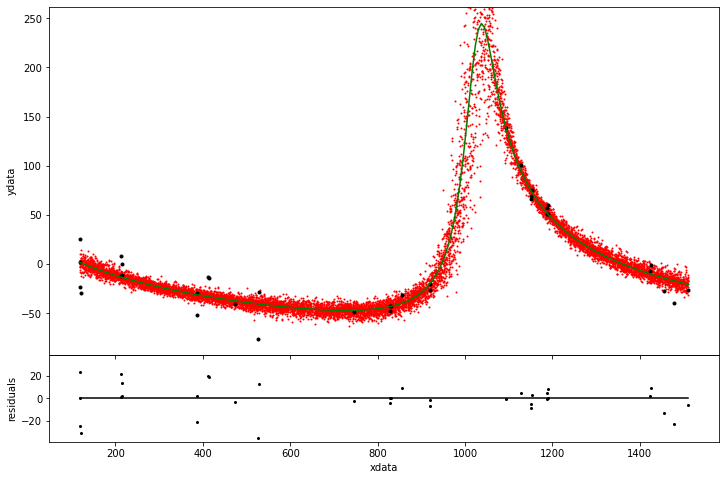

In [5]:
# define NestedSampler
ns = NestedSampler( jd, mdl, rv, weights=wgt, seed=1301 )
ns.ensemble = 500
# set limits on the noise scale of the distribution
ns.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi = ns.sample( plot=True )


In [6]:
sl = ns.samples
par = sl.parameters
std = sl.stdevs
print( "            offset   eccentr   amplit   period    phase    time ")
print( "params  ", fmt( par, max=None ) )
print( "stdevs  ", fmt( std, max=None ) )
pal = par.copy()
stl = std.copy()
pal[4] *= 180 / math.pi
pal[5] *= 0.5 * pal[2] / math.pi
stl[4] *= 180 / math.pi
stl[5] *= 0.5 * pal[2] / math.pi
print( "params  ", fmt( pal, max=None ) )
print( "stdevs  ", fmt( stl, max=None ) )
print( "scale   ", fmt( sl.scale ), " +-", fmt( sl.stdevScale ) )
print( "evidence", fmt( evi ) )

            offset   eccentr   amplit   period    phase    time 
params   [    4.964    0.725  155.560 1239.066    5.215    5.846]
stdevs   [    3.252    0.048   28.161   47.547    0.211    0.071]
params   [    4.964    0.725  155.560 1239.066  298.784  144.737]
stdevs   [    3.252    0.048   28.161   47.547   12.087    1.751]
scale       14.870  +-     1.899
evidence   -71.551


There were rumours that there could be 2 planets. We add another RadialVelocityModel and try again.

In [8]:
twopi = 2 * math.pi
rvm1 = RadialVelocityModel( )
lolim1 = [0.0, 0.0, 1000.0]
hilim1 = [0.9, 200.0, 1500.0]
rvm1.setLimits( lowLimits=lolim, highLimits=hilim )
rvm1.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm1.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
rvm2 = RadialVelocityModel( )
lolim2 = [0.0, 0.0, 10.0]
hilim2 = [0.9, 200.0, 1000.0]
rvm2.setLimits( lowLimits=lolim2, highLimits=hilim2 )
rvm2.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm2.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm2 )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl2 = pm + rvm1 + rvm2
print( mdl2 )



Polynomial: f( x:p ) = p_0 +
RadialVelocity  +
RadialVelocity 


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity  +
  RadialVelocity 
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>
Iteration   logZ        H     LowL     npar    parameters
   21732      -169.     21.7      -137.     12 
[    5.973    0.806  196.343 1210.941    5.366    5.903    0.637   18.025   17.606    5.461    3.081   11.132]
Engines              success     reject     failed       best      calls
GalileanEngine        132896      47973      84050          0      26581
ChordEngine           185944     857131         16          0      26581
Calls to LogL        1308010   to dLogL      47973
Samples       22232
Evidence       -73.376 +-      0.091


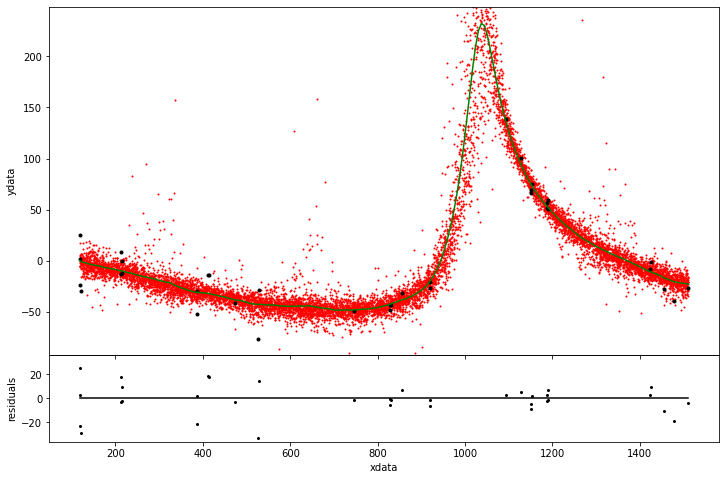

In [9]:
# define NestedSampler
ns1 = NestedSampler( jd, mdl2, rv, weights=wgt, seed=1301 )
ns1.ensemble = 500
# set limits on the noise scale of the distribution
ns1.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi1 = ns1.sample( plot=True )



In [10]:
pars2 = ns1.parameters
stdv2 = ns1.stdevs
print( fmt( par, max=None ) )
print( fmt( std, max=None ) )
print( fmt( pars2, max=None ) )
print( fmt( stdv2, max=None ) )

[    4.964    0.725  155.560 1239.066    5.215    5.846]
[    3.252    0.048   28.161   47.547    0.211    0.071]
[    4.928    0.718  150.467 1248.530    5.186    5.835    0.639   16.843  533.838    3.538    2.513]
[    4.084    0.070   33.901   77.769    0.312    0.100    0.236   18.647  340.137    1.921    1.611]


The evidence did not go up. So the 2 planet model is not better. 

We plot both models in one figure (green for 1 planet; red for 2). 
Obviously there is little in the data that supports 2 planets.

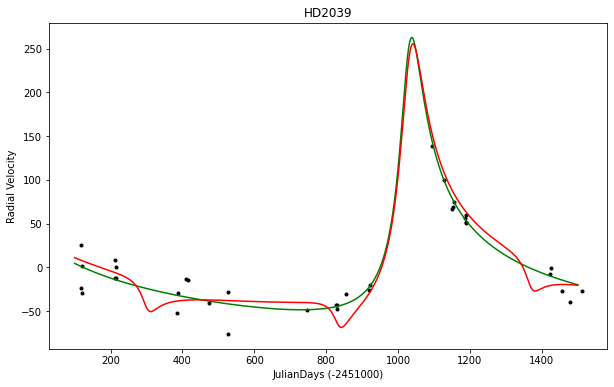

In [11]:
plt.figure( "HD2039-1", figsize=[10,6] )
plt.plot( jd, rv, 'k. ' )

xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, par ), 'g-' )
plt.plot( xx, mdl2.result( xx, ns1.parameters ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.savefig( "HD2039-1.png" )
#plt.show()

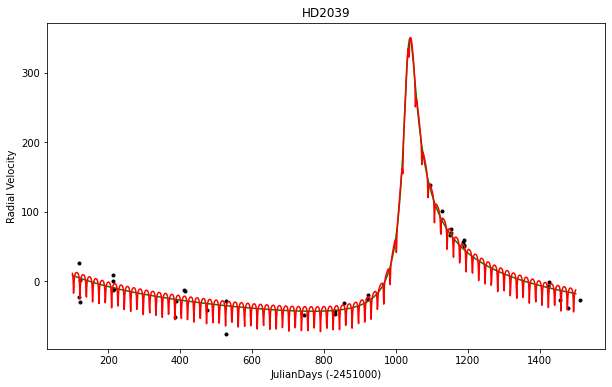

In [12]:
plt.figure( "HD2039-ml", figsize=[10,6] )
plt.plot( jd, rv, 'k. ' )

parml = ns1.samples[-1].parameters
xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, parml[:6] ), 'g-' )
plt.plot( xx, mdl2.result( xx, parml ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.savefig( "HD2039-ml.png" )
plt.show()

In [13]:
som = StellarOrbitModel()
k1 = [0,1,2,3,6]
sompar = som.parameters
sompar[k1] = pars2[1:6]

#print( sompar )
yy = som.result( xx, sompar )
xm1 = yy[:,0] * numpy.sin( yy[:,1] )
ym1 =-yy[:,0] * numpy.cos( yy[:,1] )

print( fmt( xm1, tail=4 ) )
print( fmt( ym1, tail=4 ) ) 

sompar[k1] = pars2[6:]

#print( sompar )
yy = som.result( xx, sompar )
xm2 = yy[:,0] * numpy.sin( yy[:,1] )
ym2 =-yy[:,0] * numpy.cos( yy[:,1] )

print( fmt( xm2, tail=4 ) )
print( fmt( ym2, tail=4 ) ) 



[  161.571  161.566  161.559  161.551  161.542 ...  147.709  147.541  147.372  147.202]
[  138.621  139.107  139.592  140.076  140.559 ...  197.760  198.072  198.383  198.692]
[  -10.218  -10.113  -10.009   -9.903   -9.798 ...  -20.286  -20.317  -20.348  -20.377]
[  -24.311  -24.313  -24.315  -24.316  -24.316 ...   -8.619   -8.759   -8.899   -9.038]


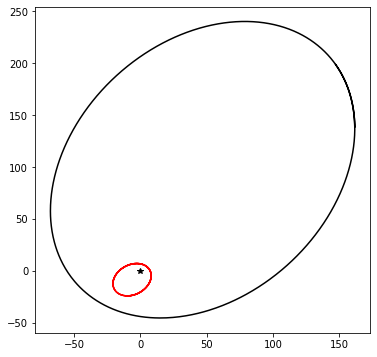

In [14]:
plt.figure( "orbit", figsize=[6,6] )

plt.plot( xm1, ym1, 'k-' )
plt.plot( xm2, ym2, 'r-' )
plt.plot( [0], [0], 'k*' )
plt.show()